In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Load the data
file_path = '../Ball_data/BallIncline_1.csv'
data = pd.read_csv(file_path, header=16, delimiter=',')
data.columns = ['x', 'y']  # Assuming two columns: x (time/position) and y (voltage)




# Find all peaks in the data
peaks, _ = find_peaks(data['y'], height=0)

# Sort peaks by their prominence (height) in descending order
sorted_peaks = sorted(peaks, key=lambda p: data['y'][p], reverse=True)

# Select the top 5 significant peaks
significant_peaks = sorted_peaks[:5]
# Store the x-values of the significant peaks for further processing
peak_centers = data['x'].iloc[significant_peaks].values


# Define a function to find the starting point of each peak
def find_peak_starts(data, peaks, threshold_fraction=0.5):
    """
    Find the starting x-values of each peak.

    Parameters:
    - data: DataFrame containing the x and y columns.
    - peaks: List of indices of detected peaks.
    - threshold_fraction: Fraction of the peak height to define the start.

    Returns:
    - peak_starts: List of x-values where each peak begins.
    """
    peak_starts = []
    for peak in peaks:
        peak_height = data['y'].iloc[peak]
        threshold = threshold_fraction * peak_height

        # Move backward from the peak to find the start
        start = peak
        while start > 0 and data['y'].iloc[start] > threshold:
            start -= 1

        # Append the x-value of the start
        peak_starts.append(data['x'].iloc[start])

    return peak_starts

# Find the starting x-values of each significant peak
peak_starts = find_peak_starts(data, significant_peaks)

# Print the starting x-values of the peaks
print("Peak Starts:", peak_starts)






Peak Starts: [np.float64(0.98124), np.float64(1.12938), np.float64(1.28492), np.float64(1.41194), np.float64(1.5307)]


In [11]:
sensor_x = np.array([11.37, 26.39, 41.23, 57.02])
sensor_std = np.array([0.07, 0.04, 0.04, 0.05])


# Calculate relative distances and corresponding errors
relative_distances = sensor_x - sensor_x[0]
relative_errors = np.sqrt(sensor_std**2 + sensor_std[0]**2)

# Print the relative distances and errors
print("Relative Distances:", relative_distances)
print("Relative Errors:", relative_errors)
# Calculate time intervals between peaks
time_intervals = np.diff(peak_starts)

# Calculate accelerations
accelerations = []
for i in range(len(relative_distances) - 1):
    distance = relative_distances[i + 1] - relative_distances[i]
    time = time_intervals[i]
    acceleration = 2 * distance / (time ** 2)
    accelerations.append(acceleration)

# Print the calculated accelerations as numbers
print("Calculated Accelerations:", [float(acc) for acc in accelerations])

Relative Distances: [ 0.   15.02 29.86 45.65]
Relative Errors: [0.09899495 0.08062258 0.08062258 0.08602325]
Calculated Accelerations: [1368.8480691468399, 1226.8167796591922, 1957.347380021737]


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

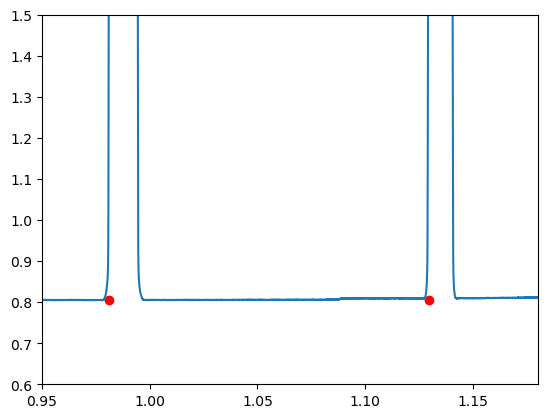

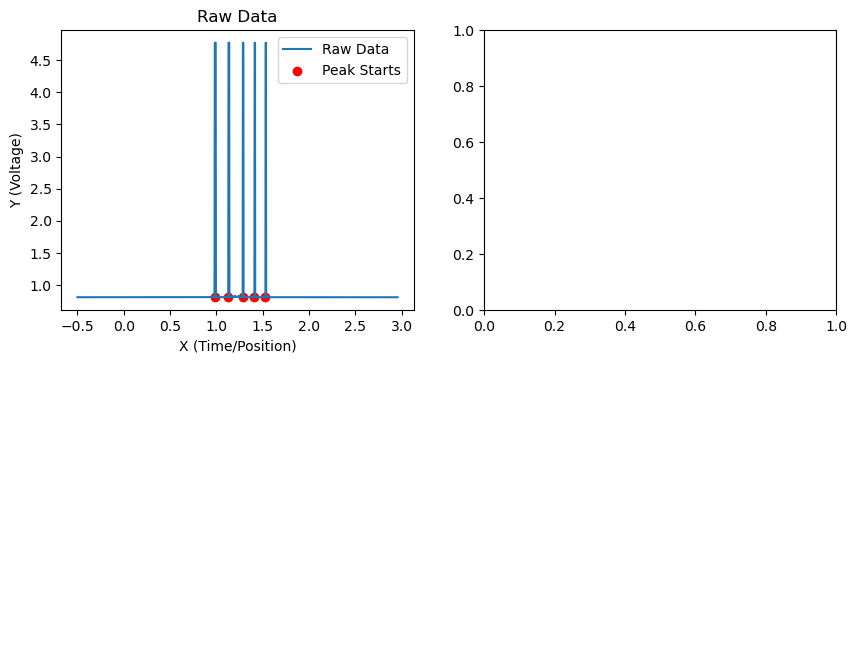

In [3]:

plt.plot(data['x'], data['y'], label='Raw Data')
plt.scatter(peak_starts, [data['y'].iloc[peaks[i]] for i in range(len(peak_starts))], 
                  color='red', label='Peak Starts')
plt.xlim(0.95, 1.18)
plt.ylim(0.6, 1.5)


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot raw data in the first subplot
axs[0, 0].plot(data['x'], data['y'], label='Raw Data')
axs[0, 0].set_xlabel('X (Time/Position)')
axs[0, 0].set_ylabel('Y (Voltage)')
axs[0, 0].set_title('Raw Data')
#

# Plot dots where each peak begins
axs[0, 0].scatter(peak_starts, [data['y'].iloc[peaks[i]] for i in range(len(peak_starts))], 
                  color='red', label='Peak Starts')
axs[0, 0].legend()
'''
   

'''
#axs[0, 1].legend()
axs[1, 0].axis('off')
axs[1, 1].axis('off')